## Load the Required Library 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
random_state=42

In [6]:
%run C:/Users/prana/Documents/NCI/PythonWorkSpace/functionsMaster.ipynb

Current working directory: C:\Users\prana\Documents\NCI\PythonWorkSpace\WearableDevices


## Load all the files recorded in Room 1 
* There are 

In [7]:
df = pd.read_csv('../WearableDevices/Data/S1_1.csv')
df.head()


,Time (seconds),Acceleration (Frontal) [G],Acceleration (Vertical) [G],Acceleration (Lateral) [G],Sensor ID,RSSI (Received Signal Strength Indicator),Phase,Frequency,Activity Label,Room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,S1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,S1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,S1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,S1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,S1


## Load all the file from Room 2

In [9]:
df1 = pd.read_csv('../WearableDevices/Data/S2_1.csv')
df1.head()

,Time (seconds),Acceleration (Frontal) [G],Acceleration (Vertical) [G],Acceleration (Lateral) [G],Sensor ID,RSSI (Received Signal Strength Indicator),Phase,Frequency,Activity Label,Room
0,0.00,-0.232160,0.215880,-1.18820,2,-48.5,2.74430,920.75,3,S2
1,0.25,-0.056282,0.043636,-1.14260,2,-50.0,2.36540,921.75,3,S2
2,0.50,0.143050,0.296270,-1.33640,3,-59.5,0.20709,922.25,3,S2
3,0.75,0.318930,0.284780,-0.92593,2,-51.0,0.41571,923.25,3,S2
4,1.05,0.412730,0.135500,-1.02860,2,-44.5,4.45470,920.25,3,S2


## contatinate both Room 1 and Room 2 data 

In [10]:
# Assuming df and df1 have the same columns
stacked_df = pd.concat([df, df1], ignore_index=True)

# Display the stacked DataFrame
stacked_df.head()

,Time (seconds),Acceleration (Frontal) [G],Acceleration (Vertical) [G],Acceleration (Lateral) [G],Sensor ID,RSSI (Received Signal Strength Indicator),Phase,Frequency,Activity Label,Room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,S1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,S1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,S1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,S1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,S1


## Locate if we have correct number of rows in each room

In [11]:
# find unique values of Room column
unique_rooms = stacked_df['Room'].unique()

print(unique_rooms)

# how many rows for room 1 and how many for room 2 ( Room 1 - 52482 rows , Room 2- 22646) 

room_counts = stacked_df['Room'].value_counts()
room_counts


['S1' 'S2']


Room
S1    52482
S2    22646
Name: count, dtype: int64

In [12]:
#save the combined dataframe

#folder_path="../WearableDevices/Data/"
#Save the DataFrame to a CSV file in the 'data' folder
#file_path = os.path.join(folder_path, 'stacked_df_file.csv')
#df.to_csv(file_path, index=False)


In [13]:
# where room = S1 change to 1
# where room = S2 change to 2 
stacked_df['Room'] = stacked_df['Room'].replace({'S1': 1, 'S2': 2})


In [14]:
show_missing(stacked_df)

,variable,dtype,count,unique,missing,pc_missing
0,Time (seconds),float64,75128,21910,0,0.0
1,Acceleration (Frontal) [G],float64,75128,175,0,0.0
2,Acceleration (Vertical) [G],float64,75128,169,0,0.0
3,Acceleration (Lateral) [G],float64,75128,205,0,0.0
4,Sensor ID,int64,75128,4,0,0.0
5,RSSI (Received Signal Strength Indicator),float64,75128,68,0,0.0
6,Phase,float64,75128,3814,0,0.0
7,Frequency,float64,75128,12,0,0.0
8,Activity Label,int64,75128,4,0,0.0
9,Room,int64,75128,2,0,0.0


In [15]:
stacked_df.head()

,Time (seconds),Acceleration (Frontal) [G],Acceleration (Vertical) [G],Acceleration (Lateral) [G],Sensor ID,RSSI (Received Signal Strength Indicator),Phase,Frequency,Activity Label,Room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,1


In [16]:
show_missing(stacked_df)

,variable,dtype,count,unique,missing,pc_missing
0,Time (seconds),float64,75128,21910,0,0.0
1,Acceleration (Frontal) [G],float64,75128,175,0,0.0
2,Acceleration (Vertical) [G],float64,75128,169,0,0.0
3,Acceleration (Lateral) [G],float64,75128,205,0,0.0
4,Sensor ID,int64,75128,4,0,0.0
5,RSSI (Received Signal Strength Indicator),float64,75128,68,0,0.0
6,Phase,float64,75128,3814,0,0.0
7,Frequency,float64,75128,12,0,0.0
8,Activity Label,int64,75128,4,0,0.0
9,Room,int64,75128,2,0,0.0


## Define subset of data for each activity for further analysis

In [17]:
ambulating=stacked_df.loc[stacked_df['Activity Label']==4]
lyingdown=stacked_df.loc[stacked_df['Activity Label']==3]
sitonbed=stacked_df.loc[stacked_df['Activity Label']==1]   

In [18]:
stacked_df.head()

,Time (seconds),Acceleration (Frontal) [G],Acceleration (Vertical) [G],Acceleration (Lateral) [G],Sensor ID,RSSI (Received Signal Strength Indicator),Phase,Frequency,Activity Label,Room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,1


## Scatter plot Time Va Acceleration(Lateral)
* Expected for a person who is moving around - lateral motion to be greter than 0 in most cases.


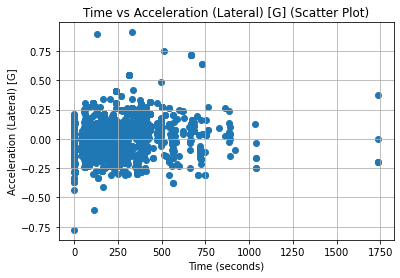

In [14]:
# Scatter plot for time vs acceleration along the lateral axis
plt.scatter(ambulating['Time (seconds)'], ambulating['Acceleration (Lateral) [G]'])
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (Lateral) [G]')
plt.title('Time vs Acceleration (Lateral) [G] (Scatter Plot)')
plt.grid(True)
plt.show()

## scatter plot of Tiem in Seconds Vs  Acceleration (Lateral) [G] - Lyingdown
* For a person who is lying down - expected to see data points alligned close to 0 or less than 0 
* There are fewer datapoints >0.3 
 

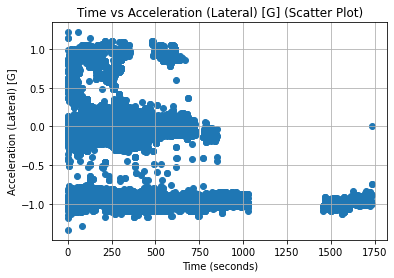

In [15]:
# Scatter plot for time vs acceleration along the lateral axis
plt.scatter(lyingdown['Time (seconds)'], lyingdown['Acceleration (Lateral) [G]'])
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (Lateral) [G]')
plt.title('Time vs Acceleration (Lateral) [G] (Scatter Plot)')
plt.grid(True)
plt.show()

## Time (seconds) vs Acceleration (Lateral) [G] - For a person who is sitting on bed
* Expected to see more data points alligned close to 0 or less than 0 . 
* Not expecting to see readings > 0.3 

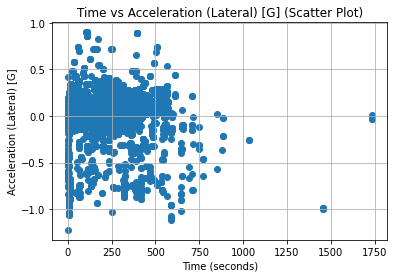

In [16]:
# Scatter plot for time vs acceleration along the lateral axis
plt.scatter(sitonbed['Time (seconds)'], sitonbed['Acceleration (Lateral) [G]'])
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (Lateral) [G]')
plt.title('Time vs Acceleration (Lateral) [G] (Scatter Plot)')
plt.grid(True)
plt.show()

## Co-relation matrix 
* Acceleration Frontal G is inversely proportional to Acceleration Vertical G- Indicating motion is constant 
* Acceleration Frontal G is +ve co-relation with Acceleration Lateral G - this could be related to when a person is walking
could also experience lateral movement due to turning. 

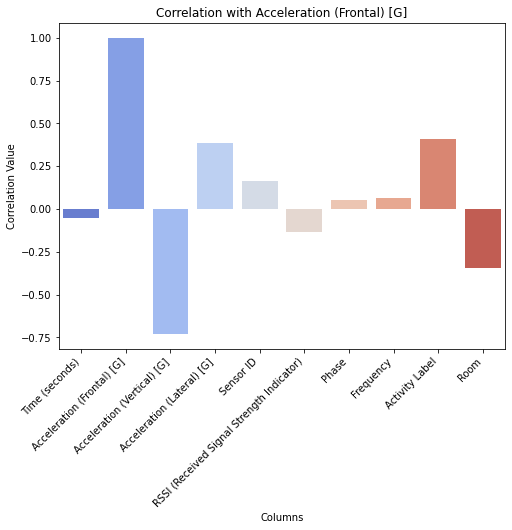

Time (seconds)                              -0.054893
Acceleration (Frontal) [G]                   1.000000
Acceleration (Vertical) [G]                 -0.731369
Acceleration (Lateral) [G]                   0.383625
Sensor ID                                    0.164388
RSSI (Received Signal Strength Indicator)   -0.133268
Phase                                        0.049632
Frequency                                    0.063254
Activity Label                               0.410755
Room                                        -0.341771
Name: Acceleration (Frontal) [G], dtype: float64


In [17]:


def get_column_correlation_with_color(df, column_name):
    
    # Compute the correlation matrix
    correlation_matrix = df.corr()
    
    # Extract the correlation values for the specified column
    column_correlation = correlation_matrix[column_name]
    
    # Plot the color-coded bar plot for the correlations
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column_correlation.index, y=column_correlation.values, palette="coolwarm")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Correlation with {column_name}")
    plt.xlabel("Columns")
    plt.ylabel("Correlation Value")
    plt.show()

    # Return the correlation series for inspection
    return column_correlation


# 'Acceleration (Frontal) [G]'
column_name = 'Acceleration (Frontal) [G]'
column_correlation_result = get_column_correlation_with_color(stacked_df, column_name)

# Display the result
print(column_correlation_result)




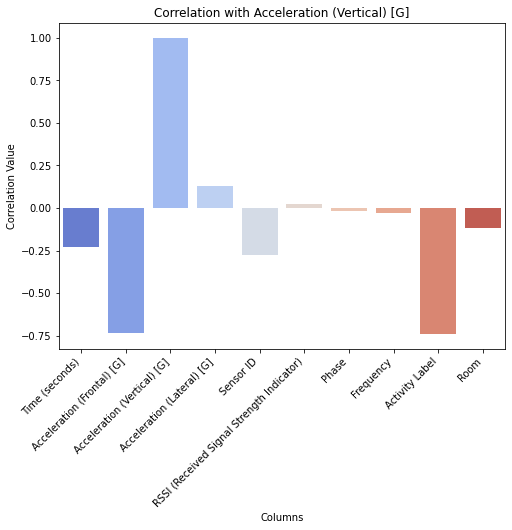

Time (seconds)                              -0.230724
Acceleration (Frontal) [G]                  -0.731369
Acceleration (Vertical) [G]                  1.000000
Acceleration (Lateral) [G]                   0.126973
Sensor ID                                   -0.276102
RSSI (Received Signal Strength Indicator)    0.024277
Phase                                       -0.015089
Frequency                                   -0.030174
Activity Label                              -0.741459
Room                                        -0.118449
Name: Acceleration (Vertical) [G], dtype: float64


In [18]:
# 'Acceleration (Frontal) [G]'
column_name = 'Acceleration (Vertical) [G]'
column_correlation_result = get_column_correlation_with_color(stacked_df, column_name)

# Display the result
print(column_correlation_result)

In [ ]:
## Study the distribution of variables in the dataset - Room 1 and Room 2 seperately


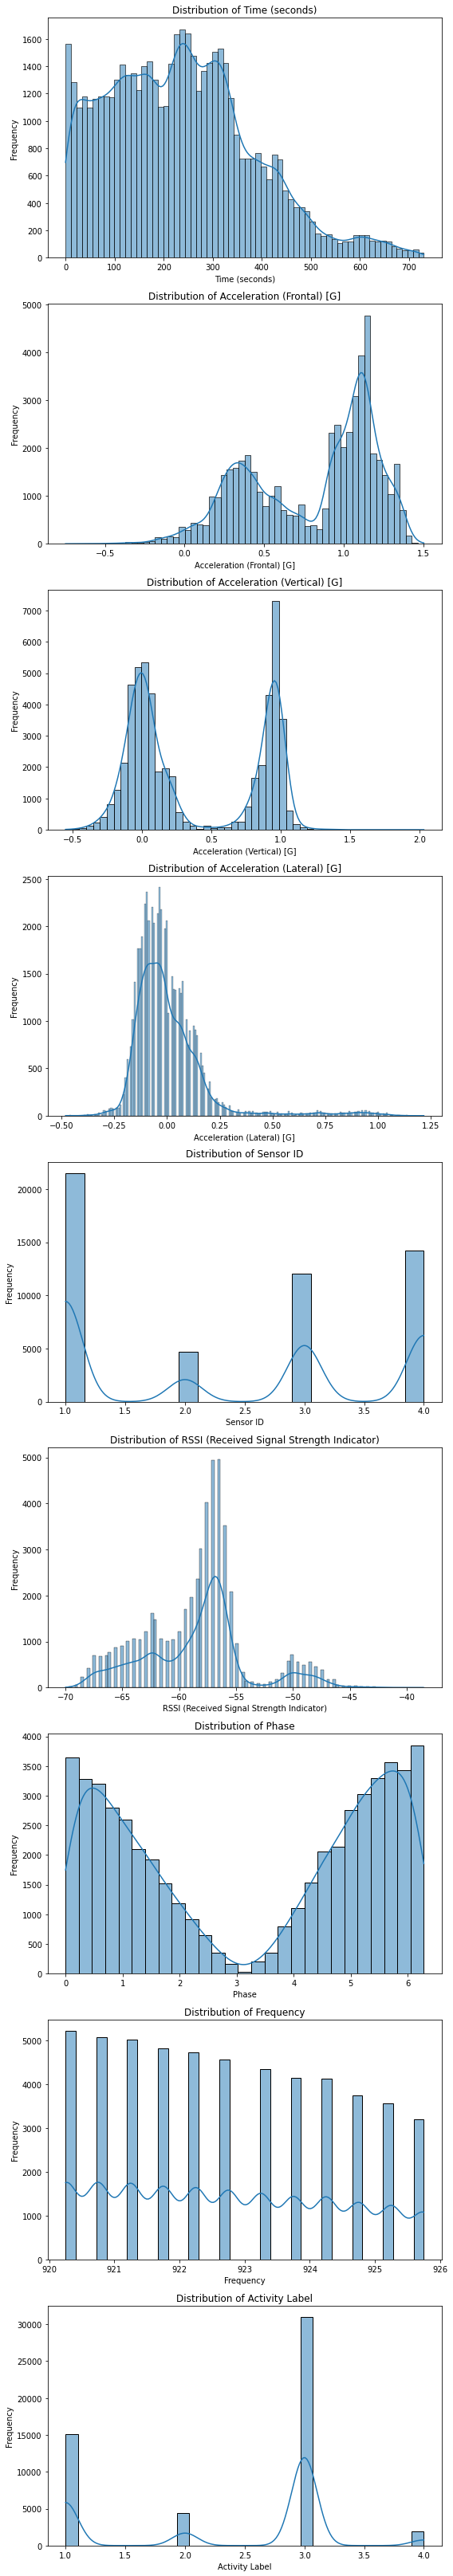

In [19]:
# knn
# https://medium.com/python-in-plain-english/understanding-k-nearest-neighbors-knn-in-python-a-step-by-step-guide-1d273e79b8d5
# https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7


# Filter data where Room is 'S1'
df_s1 = stacked_df[stacked_df['Room'] ==1]

# Set up a grid of subplots (one for each variable)
variables = df_s1.columns[:-1]  # Exclude 'Room' from the columns to plot
num_variables = len(variables)

# Create subplots
fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(8, num_variables*5))

# Plot the distribution for each variable
for i, var in enumerate(variables):
    sns.histplot(df_s1[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()






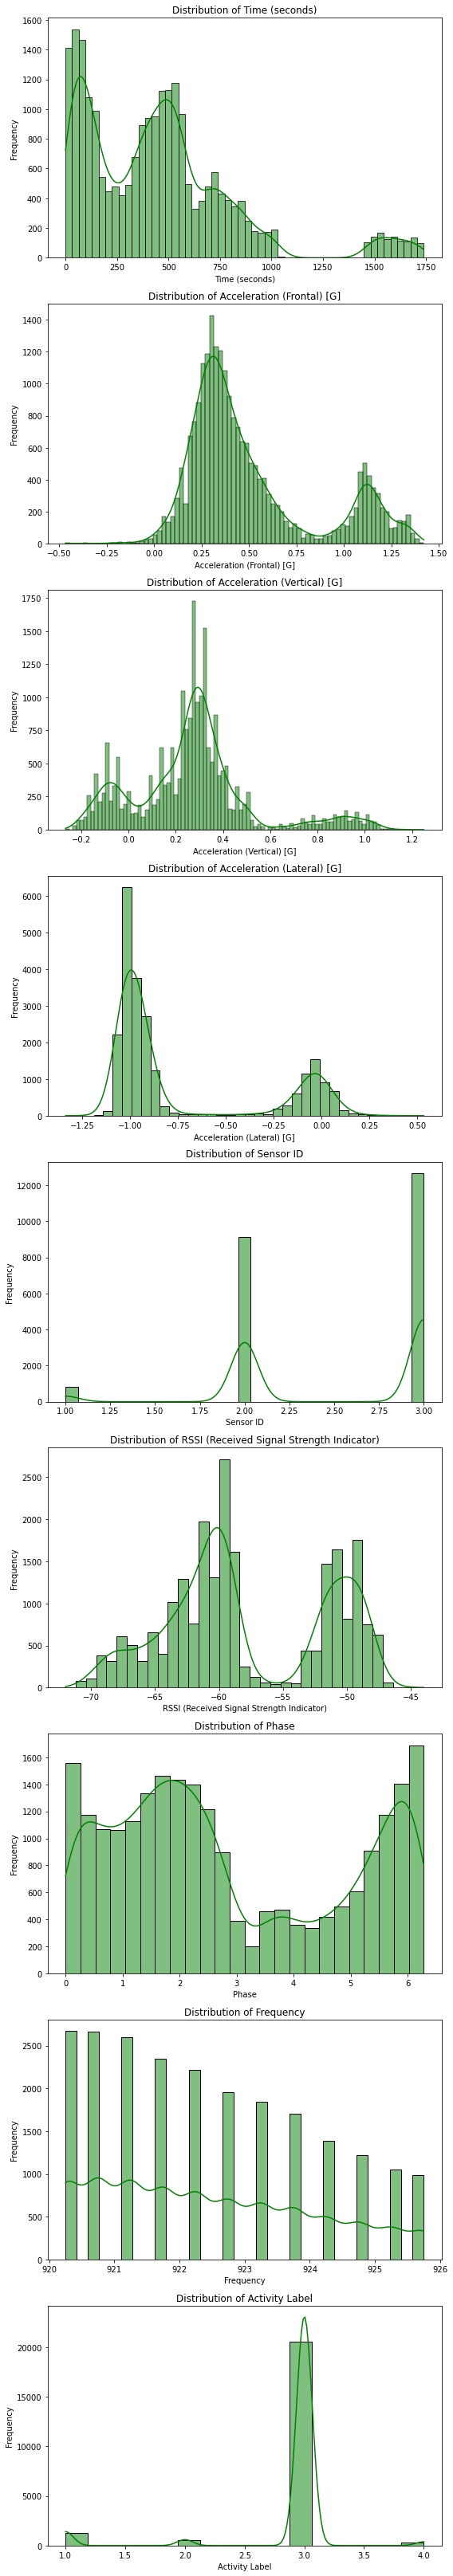

In [53]:
# Filter data where Room is 'S2'
df_s1 = stacked_df[stacked_df['Room'] ==2]

# Set up a grid of subplots (one for each variable)
variables = df_s1.columns[:-1]  # Exclude 'Room' from the columns to plot
num_variables = len(variables)

# Create subplots
fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(8, num_variables*5))

# Plot the distribution for each variable
for i, var in enumerate(variables):
    sns.histplot(df_s1[var], kde=True, ax=axes[i],color='green')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

In [20]:
# get only 10,000 10,000 rows 

# Display the stacked DataFrame
stacked_df=stacked_df.head(10000)

## Select X and Y variables for modelling 

In [21]:

# Define the features (X) and the target (y)
X = stacked_df.drop(columns=['Activity Label'])  # Features: All columns except 'Activity Label'
y = stacked_df['Activity Label']  # Target variable: 'Activity Label'

# Perform the 80/20 split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (8000, 9)
Test set size: (2000, 9)


## Scale Train and test data and Perform KNN - Accuracy: 0.9725

In [22]:
# knn

# Feature Scaling: KNN is sensitive to the scale of the features, so we scale them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN model (You can adjust the n_neighbors parameter as needed)
knn1 = KNeighborsClassifier(n_neighbors=5)  # You can tune this parameter

# Train the model
knn1.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn1 = knn1.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_knn1)
print("Accuracy:", accuracy)

cm1=confusion_matrix(y_test, y_pred_knn1)
# Confusion matrix and classification report for more detailed evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn1))

Accuracy: 0.9725
Confusion Matrix:
 [[ 512    1    7    2]
 [   5  218    0    7]
 [   0    0 1151    1]
 [  23    7    2   64]]

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.98      0.96       522
           2       0.96      0.95      0.96       230
           3       0.99      1.00      1.00      1152
           4       0.86      0.67      0.75        96

    accuracy                           0.97      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.97      0.97      0.97      2000



## Optimise the value of K - number of neighbours. 

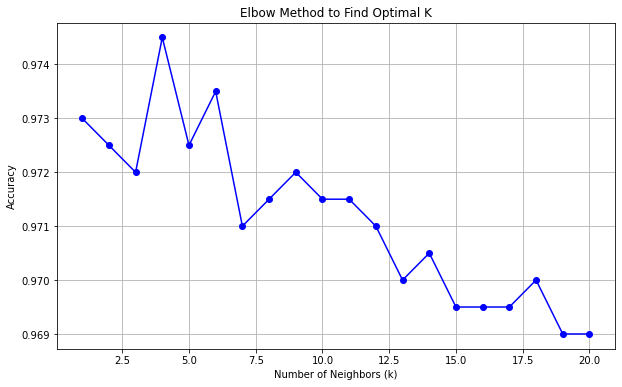

In [23]:
# optimise value of k 

# List to store accuracy scores for different k values
k_values = range(1, 21)  # Test k from 1 to 20
accuracy_scores = []

# Train and evaluate KNN for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)  # Train the model
    y_pred = knn.predict(X_test_scaled)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores.append(accuracy)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [24]:
# knn 1
# Create the KNN model (You can adjust the n_neighbors parameter as needed)
knn2 = KNeighborsClassifier(n_neighbors=4)  # You can tune this parameter

# Train the model
knn2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn2 = knn2.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_knn2)
print("Accuracy:", accuracy)

cm2=confusion_matrix(y_test, y_pred_knn2)


cf_matrix=confusion_matrix(y_test, y_pred_knn2)
# Confusion matrix and classification report for more detailed evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn2))


Accuracy: 0.9745
Confusion Matrix:
 [[ 515    0    6    1]
 [   5  219    0    6]
 [   0    0 1151    1]
 [  23    7    2   64]]

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       522
           2       0.97      0.95      0.96       230
           3       0.99      1.00      1.00      1152
           4       0.89      0.67      0.76        96

    accuracy                           0.97      2000
   macro avg       0.95      0.90      0.92      2000
weighted avg       0.97      0.97      0.97      2000



## Apply classification models such as - Random Forest
* Random Forest Accuracy: 0.982
* SVM Accuracy: 0.9125
* Decision Tree Accuracy: 0.976
    
* After analysing Random Forest F1-scores for activity level 4 still need to be improved. 
* This could be as a result of imbalanced dataset. 

In [11]:
# support Vector 

# Features and target variable
X = stacked_df.drop(columns=['Activity Label'])  # Drop target column
y = stacked_df['Activity Label']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       522
           2       0.97      0.96      0.97       230
           3       1.00      1.00      1.00      1152
           4       0.89      0.78      0.83        96

    accuracy                           0.98      2000
   macro avg       0.96      0.93      0.94      2000
weighted avg       0.98      0.98      0.98      2000



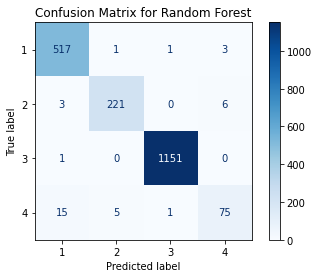


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.93      0.86       522
           2       0.76      0.56      0.65       230
           3       1.00      1.00      1.00      1152
           4       0.83      0.60      0.70        96

    accuracy                           0.91      2000
   macro avg       0.85      0.77      0.80      2000
weighted avg       0.91      0.91      0.91      2000



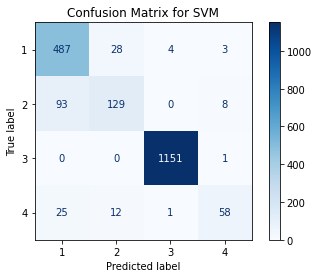


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       522
           2       0.97      0.96      0.96       230
           3       1.00      1.00      1.00      1152
           4       0.77      0.78      0.77        96

    accuracy                           0.98      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.98      0.98      0.98      2000



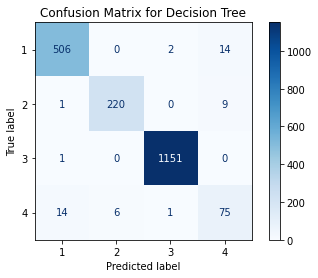

Random Forest Accuracy: 0.982
SVM Accuracy: 0.9125
Decision Tree Accuracy: 0.976


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier()  
}

accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    
 # Print the classification report for each model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
 # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Plot Confusion Matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

    

# Print accuracy results
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name} Accuracy: {accuracy}')